In [1]:
# benötigte Bibliotheken
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import svm, metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Einlesen der Datei
df_train_data = pd.read_csv("ML_Train_Data_5_states.csv")

In [3]:
df_train_data 

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,42,43,44,45,46,47,48,49,50,Classification
0,200,5.551115e-18,0.000045,0.000124,0.000037,0.000079,0.000097,0.000014,0.000056,0.000122,...,0.000093,0.000046,0.000076,0.000032,0.000097,0.000058,0.000056,0.000109,0.000018,1
1,201,4.662937e-18,0.000102,0.000038,0.000159,0.000080,0.000073,0.000084,0.000122,0.000122,...,0.000132,0.000051,0.000112,0.000087,0.000056,0.000041,0.000070,0.000055,0.000095,1
2,202,3.774758e-18,0.000078,0.000185,0.000107,0.000155,0.000105,0.000072,0.000086,0.000051,...,0.000035,0.000074,0.000073,0.000059,0.000088,0.000150,0.000128,0.000104,0.000003,1
3,203,7.549517e-18,0.000029,0.000010,0.000100,0.000120,0.000056,0.000093,0.000064,0.000078,...,0.000101,0.000057,0.000089,0.000074,0.000041,0.000049,0.000028,0.000108,0.000038,1
4,204,4.440892e-18,0.000036,0.000076,0.000092,0.000080,0.000052,0.000077,0.000056,0.000054,...,0.000032,0.000095,0.000005,0.000081,0.000064,0.000055,0.000031,0.000081,0.000060,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,1346,4.662937e-18,0.007596,0.000754,0.002892,0.006876,0.000388,0.004035,0.005276,0.007743,...,0.004995,0.006325,0.028685,0.005690,0.007782,0.004057,0.006100,0.001161,0.000048,5
466,1347,3.597123e-17,0.007580,0.004859,0.001607,0.001137,0.002400,0.007017,0.006687,0.004444,...,0.004397,0.006016,0.020943,0.012466,0.008567,0.002319,0.010104,0.001673,0.000447,5
467,1348,2.398082e-17,0.005842,0.006615,0.005058,0.009151,0.004129,0.002738,0.005059,0.007364,...,0.003020,0.015889,0.026419,0.006675,0.006538,0.005430,0.008903,0.001339,0.000129,5
468,1349,1.842970e-17,0.006961,0.006116,0.000546,0.010210,0.006141,0.006880,0.005874,0.007513,...,0.002035,0.001941,0.023244,0.004239,0.007213,0.003524,0.004524,0.001916,0.000239,5


In [4]:
# festlegen der Klassen, erstellen eines Arrey
split_factor = 0.9
classes = ['Stillstand', 'Spülen', 'Vorwäsche', 'Waschen', 'Schleudern']
X = df_train_data.iloc[:, 1:52].values
y = df_train_data.iloc[:, 52].values
print(X)
print(y)

[[5.55111512e-18 4.51967469e-05 1.24132643e-04 ... 5.63927324e-05
  1.08522416e-04 1.76300000e-05]
 [4.66293670e-18 1.02364412e-04 3.84318891e-05 ... 7.04015239e-05
  5.50384099e-05 9.54500000e-05]
 [3.77475828e-18 7.75499468e-05 1.84601224e-04 ... 1.27618792e-04
  1.04179919e-04 3.46000000e-06]
 ...
 [2.39808173e-17 5.84164165e-03 6.61496308e-03 ... 8.90306809e-03
  1.33892492e-03 1.28730000e-04]
 [1.84297022e-17 6.96099766e-03 6.11573776e-03 ... 4.52359866e-03
  1.91643919e-03 2.39010000e-04]
 [6.43929354e-18 1.28355136e-02 6.49618150e-03 ... 4.96711498e-03
  5.61376693e-03 5.26200000e-05]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 3 3 3 3 3 3 3 3 3 

In [5]:
# Ausgabe der Daten in einem 2-Dimensionalen Array
n_samples = len(X)
data = X.reshape((n_samples, -1))
data

array([[5.55111512e-18, 4.51967469e-05, 1.24132643e-04, ...,
        5.63927324e-05, 1.08522416e-04, 1.76300000e-05],
       [4.66293670e-18, 1.02364412e-04, 3.84318891e-05, ...,
        7.04015239e-05, 5.50384099e-05, 9.54500000e-05],
       [3.77475828e-18, 7.75499468e-05, 1.84601224e-04, ...,
        1.27618792e-04, 1.04179919e-04, 3.46000000e-06],
       ...,
       [2.39808173e-17, 5.84164165e-03, 6.61496308e-03, ...,
        8.90306809e-03, 1.33892492e-03, 1.28730000e-04],
       [1.84297022e-17, 6.96099766e-03, 6.11573776e-03, ...,
        4.52359866e-03, 1.91643919e-03, 2.39010000e-04],
       [6.43929354e-18, 1.28355136e-02, 6.49618150e-03, ...,
        4.96711498e-03, 5.61376693e-03, 5.26200000e-05]])

In [6]:
# Daten für das maschinelle Lernen in Trainings- und Testsätze aufteilen 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_factor, random_state=1, stratify=y)

sc = StandardScaler() #Daten standardisieren
sc.fit(X_train) #passt das Standard Scaler-Objekt an die Trainingsdaten X_train an
X_train_std = sc.transform(X_train) 
X_test_std = sc.transform(X_test)

In [7]:
# Parameter festlegen
classifier = MLPClassifier(alpha=0.2, max_iter=5000, verbose=True, early_stopping=False)

In [8]:
# Trainingsdaten anpassen
classifier.fit(X_train_std,y_train)



Iteration 1, loss = 1.98300291
Iteration 2, loss = 1.85654298
Iteration 3, loss = 1.75215450
Iteration 4, loss = 1.67211549
Iteration 5, loss = 1.61820071
Iteration 6, loss = 1.58546838
Iteration 7, loss = 1.56284766
Iteration 8, loss = 1.54443825
Iteration 9, loss = 1.52852962
Iteration 10, loss = 1.51447809
Iteration 11, loss = 1.50199806
Iteration 12, loss = 1.49100280
Iteration 13, loss = 1.48131048
Iteration 14, loss = 1.47263275
Iteration 15, loss = 1.46485008
Iteration 16, loss = 1.45778588
Iteration 17, loss = 1.45127295
Iteration 18, loss = 1.44516737
Iteration 19, loss = 1.43932445
Iteration 20, loss = 1.43363121
Iteration 21, loss = 1.42804472
Iteration 22, loss = 1.42253829
Iteration 23, loss = 1.41706652
Iteration 24, loss = 1.41161670
Iteration 25, loss = 1.40616063
Iteration 26, loss = 1.40066471
Iteration 27, loss = 1.39512246
Iteration 28, loss = 1.38962108
Iteration 29, loss = 1.38407523
Iteration 30, loss = 1.37856331
Iteration 31, loss = 1.37311326
Iteration 32, los

Iteration 361, loss = 0.75865097
Iteration 362, loss = 0.75772849
Iteration 363, loss = 0.75684142
Iteration 364, loss = 0.75596662
Iteration 365, loss = 0.75503339
Iteration 366, loss = 0.75414007
Iteration 367, loss = 0.75330695
Iteration 368, loss = 0.75240583
Iteration 369, loss = 0.75148237
Iteration 370, loss = 0.75063160
Iteration 371, loss = 0.74977268
Iteration 372, loss = 0.74888227
Iteration 373, loss = 0.74801535
Iteration 374, loss = 0.74714003
Iteration 375, loss = 0.74628146
Iteration 376, loss = 0.74540319
Iteration 377, loss = 0.74455913
Iteration 378, loss = 0.74363088
Iteration 379, loss = 0.74283465
Iteration 380, loss = 0.74195925
Iteration 381, loss = 0.74112318
Iteration 382, loss = 0.74028567
Iteration 383, loss = 0.73941556
Iteration 384, loss = 0.73860156
Iteration 385, loss = 0.73777927
Iteration 386, loss = 0.73689828
Iteration 387, loss = 0.73607156
Iteration 388, loss = 0.73519001
Iteration 389, loss = 0.73439315
Iteration 390, loss = 0.73361514
Iteration 

Iteration 843, loss = 0.55275222
Iteration 844, loss = 0.55260585
Iteration 845, loss = 0.55252363
Iteration 846, loss = 0.55239311
Iteration 847, loss = 0.55222274
Iteration 848, loss = 0.55207652
Iteration 849, loss = 0.55194673
Iteration 850, loss = 0.55181021
Iteration 851, loss = 0.55169502
Iteration 852, loss = 0.55155079
Iteration 853, loss = 0.55146362
Iteration 854, loss = 0.55131588
Iteration 855, loss = 0.55121579
Iteration 856, loss = 0.55107701
Iteration 857, loss = 0.55097726
Iteration 858, loss = 0.55081961
Iteration 859, loss = 0.55071707
Iteration 860, loss = 0.55059683
Iteration 861, loss = 0.55045563
Iteration 862, loss = 0.55035165
Iteration 863, loss = 0.55023309
Iteration 864, loss = 0.55009349
Iteration 865, loss = 0.54997104
Iteration 866, loss = 0.54983813
Iteration 867, loss = 0.54973438
Iteration 868, loss = 0.54960107
Iteration 869, loss = 0.54946080
Iteration 870, loss = 0.54935241
Iteration 871, loss = 0.54925790
Iteration 872, loss = 0.54913417
Iteration 

MLPClassifier(alpha=0.2, max_iter=5000, verbose=True)

In [9]:

predicted = classifier.predict(X_test_std)
probabilities = classifier.predict_proba(X_test_std)

Classification report for classifier MLPClassifier(alpha=0.2, max_iter=5000, verbose=True):
              precision    recall  f1-score   support

           1       0.22      0.16      0.19        85
           2       0.26      0.23      0.24        84
           3       0.28      0.37      0.32        84
           4       0.31      0.41      0.36        85
           5       0.94      0.69      0.80        85

    accuracy                           0.37       423
   macro avg       0.40      0.37      0.38       423
weighted avg       0.40      0.37      0.38       423




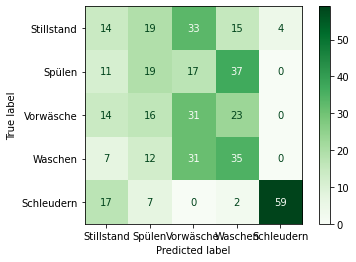

In [12]:
# Report

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
cm = confusion_matrix(y_test, predicted, labels=classifier.classes_) #Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes) #Beschriftung

disp.plot(cmap=plt.cm.Greens) 
plt.show()